In [1]:
import numpy as np
import pandas as pd
%precision 3 
# 소숫점 3자리 출력
pd.set_option('precision',3)

In [2]:
df=pd.read_csv('./scores_em.csv',index_col='학번',encoding='cp949')
df.head()

,영어,수학
학번,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [3]:
scores = np.array(df['영어'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [4]:
score_df=pd.DataFrame({'학점':scores},
                     index=pd.Index(['A','B','C','D','E',
                                     'F','G', 'H', 'I', 'J'], 
                                    name='학생'))
score_df

,학점
학생,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


평균

In [5]:
sum(scores) / len(scores)

55.0

In [6]:
np.mean(scores)

55.0

In [7]:
score_df.mean()

학점    55.0
dtype: float64

중앙값

In [8]:
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [9]:
n =len(sorted_scores)
if n % 2 == 0:
    m0 = sorted_scores[n//2 -1]
    m1 = sorted_scores[n//2]
    median =(m0 +m1) / 2
else:
    median =sorted_scores[(n+1)//2-1]
median

56.5

In [10]:
np.median(scores)

56.5

In [11]:
score_df.median()

학점    56.5
dtype: float64

최빈값

In [12]:
pd.Series([1,1,1,2,2,3]).mode()

0    1
dtype: int64

In [13]:
pd.Series([1,2,3,4,5]).mode()

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [14]:
mean = np.mean(scores)
deviation = scores-mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [15]:
anothor_scores =[50, 60, 58, 54, 51, 56, 57,53,52,59]
anothor_mean = np.mean(anothor_scores)
anothor_deviation =anothor_scores - anothor_mean
anothor_deviation

array([-5.,  5.,  3., -1., -4.,  1.,  2., -2., -3.,  4.])

In [16]:
np.mean(deviation)

0.0

In [17]:
summary_df = score_df.copy()
summary_df['편차'] = deviation
summary_df

,학점,편차
학생,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [18]:
summary_df.mean() # 편차를 평균을 냈을때 0이 나와야함 즉 검산

학점    55.0
편차     0.0
dtype: float64

분산

In [19]:
np.mean(deviation **2)

86.0

In [20]:
np.var(scores)

86.0

In [21]:
score_df

,학점
학생,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [22]:
score_df.var(ddof=2) # 수식 계산시에는 표준값이 N-1로 처리되어 있음 다라서 표본에 대한 ddof 표본량 조정

학점    107.5
dtype: float64

표준편차

In [23]:
np.sqrt(np.var(scores,ddof=0))

9.273618495495704

In [24]:
np.std(scores, ddof=0)

9.273618495495704

In [25]:
np.max(scores)-np.min(scores)

28

사분수위 범위

In [26]:
scores_Q1 =  np.percentile(scores,25)
scores_Q3 =  np.percentile(scores,75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.0

데이터 지표의 요약

In [27]:
pd.Series(scores).describe()

count    10.000
mean     55.000
std       9.775
min      41.000
25%      48.250
50%      56.500
75%      63.250
max      69.000
dtype: float64

In [28]:
z = (scores-np.mean(scores)) / np.std(scores)
z

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])

In [29]:
np.mean(z), np.std(z, ddof=0)

(-1.6653345369377347e-17, 0.9999999999999999)

편차

In [30]:
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [31]:
y = 50 + 10 * (scores - np.mean(scores)) /np.std(scores)
# 50은 모집단의 크기, 10은 표본의 크기

In [32]:
score_df['편차'] = y
score_df

,학점,편차
학생,,
A,42,35.982
B,69,65.097
C,56,51.078
D,41,34.903
E,57,52.157
F,48,42.452
G,65,60.783
H,49,43.530
I,65,60.783


데이터 시각화

In [33]:
english_scores= np.array(df['영어'])
pd.Series(english_scores).describe()

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
dtype: float64

학위분포표

In [34]:
freg, _ = np.histogram(english_scores, bins=10, range=(0,100))
freg

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [35]:
freg_class = [f'{i} ~ {i+10}' for i in range(0, 100, 10)]
freg_dist_df = pd.DataFrame({'도수':freg},
                           index=pd.Index(freg_class, name='분포'))
freg_dist_df

,도수
분포,
0 ~ 10,0
10 ~ 20,0
20 ~ 30,0
30 ~ 40,2
40 ~ 50,8
50 ~ 60,16
60 ~ 70,18
70 ~ 80,6
80 ~ 90,0


In [36]:
class_value =[(i+(i+10)) // 2 for i in range(0,100,10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [37]:
rel_freg =freg /freg.sum()
rel_freg

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [38]:
cum_rel_freg = np.cumsum(rel_freg) # 값을 axis 방향으로 누적함
cum_rel_freg

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [39]:
freg_dist_df['계급값'] = class_value
freg_dist_df['상대도수'] = rel_freg
freg_dist_df['누적상대도수'] = cum_rel_freg
freg_dist_df = freg_dist_df[['계급값','도수','상대도수','누적상대도수']]
freg_dist_df

,계급값,도수,상대도수,누적상대도수
분포,,,,
0 ~ 10,5,0,0.00,0.00
10 ~ 20,15,0,0.00,0.00
20 ~ 30,25,0,0.00,0.00
30 ~ 40,35,2,0.04,0.04
40 ~ 50,45,8,0.16,0.20
50 ~ 60,55,16,0.32,0.52
60 ~ 70,65,18,0.36,0.88
70 ~ 80,75,6,0.12,1.00
80 ~ 90,85,0,0.00,1.00


최빈값 다시하기

In [40]:
freg_dist_df.loc[freg_dist_df['도수'].idxmax(), '계급값']

65

히스토그램

In [41]:
!!conda install matplotlib

['Collecting package metadata (current_repodata.json): ...working... done',
 'Solving environment: ...working... done',
 '',
 '# All requested packages already installed.',
 '']

In [42]:
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

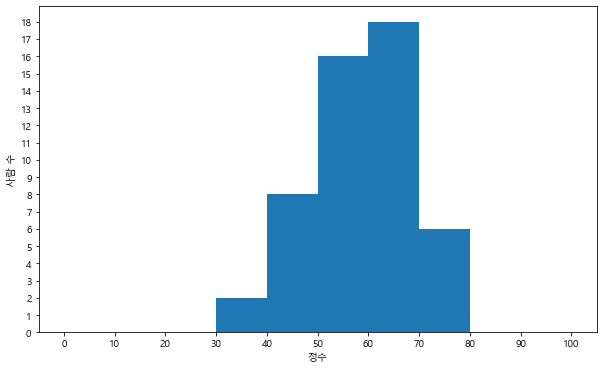

In [49]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_name)
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)
freg,_,_=ax.hist(english_scores,bins=10,range=(0,100))
ax.set_xlabel('정수')
ax.set_ylabel('사람 수')
ax.set_xticks(np.linspace(0,100,10+1))
ax.set_yticks(np.arange(0,freg.max()+1))
plt.show()

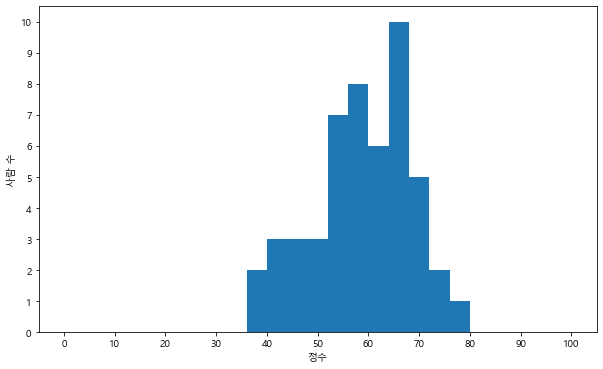

In [50]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_name)
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)
freg,_,_=ax.hist(english_scores,bins=25,range=(0,100))
ax.set_xlabel('정수')
ax.set_ylabel('사람 수')
ax.set_xticks(np.linspace(0,100,10+1))
ax.set_yticks(np.arange(0,freg.max()+1))
plt.show()

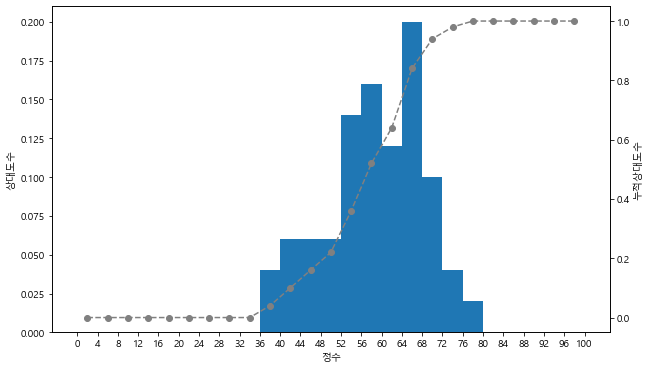

In [56]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)
ax2 = ax.twinx()
weights = np.ones_like(english_scores)/len(english_scores)
rel_freg,_,_=ax.hist(english_scores,bins=25,range=(0,100),weights=weights)
cum_rel_freg = np.cumsum(rel_freg)
class_value=[(i+(i+4))//2 for i in range(0,100,4)]
ax2.plot(class_value,cum_rel_freg,ls='--',marker='o',color='gray')
#ax.grid(visible=False)
ax.set_xlabel('정수')
ax.set_ylabel('상대도수')
ax2.set_ylabel('누적상대도수')
#ax2.grid(visible=False)
ax.set_xticks(np.linspace(0,100,25+1))
#ax.set_yticks(np.arange(0,freg.max()+1))
plt.show()

In [58]:
df1=pd.read_csv('./경기도_이천시_지역화폐발행 및 이용현황_20200824.csv',encoding='cp949')
df1

,시군명,기준년월,업종명(대분류),업종코드,세부업종,카드사용액,모바일사용액,지류상품권사용액
0,이천시,2019-04,일반휴게음식,8001,일반한식,8626310,해당없음,해당없음
1,이천시,2019-04,의류,4203,아동의류,2732060,해당없음,해당없음
2,이천시,2019-04,의원,7020,의원,2342840,해당없음,해당없음
3,이천시,2019-04,약국,7041,약국,1147560,해당없음,해당없음
4,이천시,2019-04,일반휴게음식,8006,서양음식,1012450,해당없음,해당없음
...,...,...,...,...,...,...,...,...
2067,이천시,2020-07,문화.취미,2201,골동품점,20700,해당없음,해당없음
2068,이천시,2020-07,여행,1110,관광여행,16000,해당없음,해당없음
2069,이천시,2020-07,의류,4210,맞춤복점,10000,해당없음,해당없음
2070,이천시,2020-07,유통업영리,4076,인터넷P/G,1300,해당없음,해당없음


In [59]:
card= np.array(df1['카드사용액'])
card

array([8626310, 2732060, 2342840, ...,   10000,    1300,    3204],
      dtype=int64)

In [64]:
freq2=df1['세부업종'].value_counts()
a=pd.DataFrame(freq2)
a

,세부업종
기타교육기관,16
액세서리,16
제과점,16
스넥,16
슈퍼마켓,16
...,...
정수기,1
사무용OA기기,1
기타광학제품,1
가례서비스업,1


In [71]:
freq3=df1['업종명(대분류)'].value_counts()
ab=pd.DataFrame(freq3)
ab

,업종명(대분류)
보건위생,141
일반휴게음식,140
학원,123
레저업소,122
신변잡화,116
의류,98
자동차정비유지,95
문화.취미,91
건축자재,87
서적문구,86


In [69]:
card_df=pd.DataFrame({'사용내역':card})
print('최고 값은 ',card_df.max())
print('평균 값은 ',int(card_df.mean()))
print('최소 값은',card_df.min())
print('최빈 값은',card_df.mode())

최고 값은  사용내역    699508203
dtype: int64
평균 값은  8376677
최소 값은 사용내역    1000
dtype: int64
최빈 값은      사용내역
0  100000
